In [1]:
# Load necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas
import math
%matplotlib inline


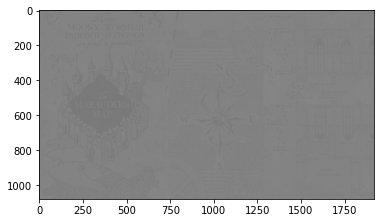

In [2]:
mMap = cv2.imread("../images/map.jpeg")
plt.imshow(mMap)

In [3]:
def drawHistogram(img):
    his = np.zeros(256,)
    a = img.flatten()
    for i in a:
        his[i] = his[i]+1
    return his

In [4]:
# # Reference
src = mMap #cv2.cvtColor(mMap, cv2.COLOR_BGR2GRAY)
# dst = cv2.equalizeHist(src)
# plt.imshow(dst,cmap='gray')     

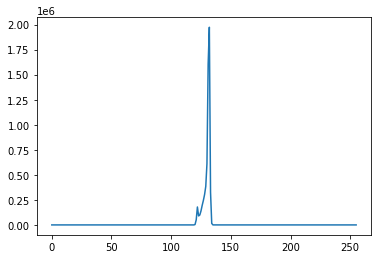

In [5]:
histg = drawHistogram(src)
# show the plotting graph of an image
plt.plot(histg)
plt.show()
# print(histg)

In [6]:
def histEqualization(img):
    histogram = np.zeros((256,), dtype=int)
    #print(histogram.shape)
    flatten = np.ravel(img)
    for i in flatten:
        histogram[i] += 1
    # print(histogram)
    TotalPixels = np.sum(histogram)
    # print(TotalPixels)
    # Find CDF
    for i in range(255):
        histogram[i+1] += histogram[i]

    histogramNorm = (histogram - histogram.min())*255
    Max = TotalPixels - histogram.min()
    histI = (histogramNorm/Max).astype('uint8')

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row][col] = histI[img[row][col]]
    return img
#     plt.imshow(src,cmap='gray')
#     cv2.imwrite("MarauderEqualise.jpg", src)

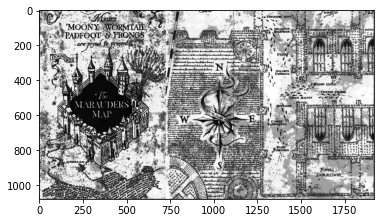

In [7]:
EqualisedMarauder = histEqualization(mMap)
plt.imshow(EqualisedMarauder, cmap='gray')

93


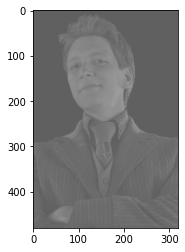

0


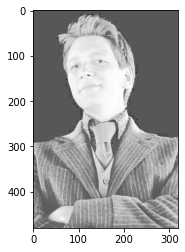

In [8]:
Fred = cv2.imread("../images/fred.jpeg")
# src = cv2.cvtColor(Fred, cv2.COLOR_BGR2GRAY)
print(np.min(Fred))
plt.imshow(Fred)
plt.show()
EqualisedFred = histEqualization(Fred)
print(np.min(EqualisedFred))
plt.imshow(EqualisedFred)
plt.show()

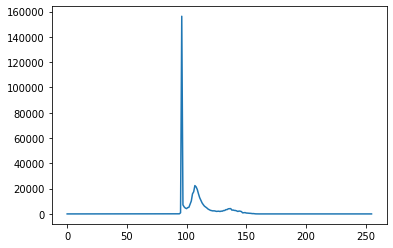

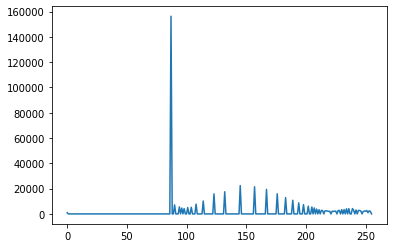

In [9]:
Fred = cv2.imread("../images/fred.jpeg")
plt.plot(drawHistogram(Fred))
plt.show()
EqualisedFred = histEqualization(Fred)
plt.plot(drawHistogram(EqualisedFred))
plt.show()

In [10]:
print

<function print>

### Explanation:
For fred.img, we see that the initial image histogram is confined to a very small range(in the 100-150 range) due to which the image is predominantly grey.

But after applying histogram equalisation, we see a relatively more uniform distribution of the intensity values due to which we get a more contrasting image with more brighter values. The values are moving much towards left(darker) side because the cdf accumulation shoots up only after the massive spike which is why probablity of pixel becoming darker is less.

In [11]:
def histMatching(img,ref):
    histImg = drawHistogram(img)
    cdfImg = np.zeros(256)
    ###
    pdfImg = histImg/(img.shape[0]*img.shape[1])
    ### 
    cdfImg[0] = pdfImg[0]
    for i in range(1,256):
        cdfImg[i]=cdfImg[i-1]+pdfImg[i]
    ###
    histRef = drawHistogram(ref)
    cdfRef = np.zeros(256)
    ###
    pdfRef = histRef/(ref.shape[0]*ref.shape[1])
    ###
    cdfRef[0] = pdfRef[0]
    for i in range(1,256):
        cdfRef[i]=cdfRef[i-1]+pdfRef[i]
    ###
    imgT = np.floor(cdfImg*255)
    refT = np.floor(cdfRef*255)
    inv = np.zeros_like(cdfRef)
    out = np.zeros_like(img)
    ###
# #     print(imgT)
# #     print(refT)
#     print(cdfImg.shape)
#     print(cdfRef.shape)
#     print(cdfImg)
#     print(cdfRef)
    ###
    for i in range(256):
        val = np.abs(cdfRef-cdfImg[i])
        minimum = 255 #Abritrary large value
        for j in range(256):
            if val[j]<val[minimum]:
                minimum = j
        inv[i] = minimum    
#     print(inv)
#     print(inv.shape)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row][col] = inv[img[row][col]]
    return img

In [12]:
mMap = cv2.imread("../images/map.jpeg")
# mMap = cv2.cvtColor(mMap,cv2.COLOR_BGR2GRAY)
mRef = cv2.imread("../images/map-reference.jpeg")
# mRef = cv2.cvtColor(mRef,cv2.COLOR_BGR2GRAY)
Map = mMap
Ref = mRef

In [13]:
out = histMatching(mMap,mRef)

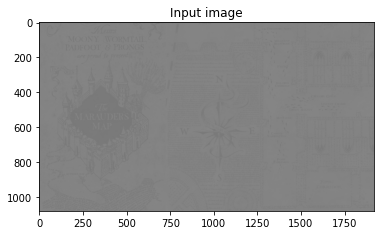

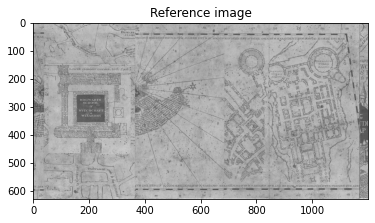

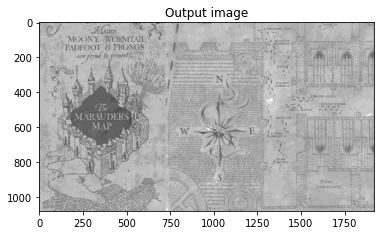

In [14]:
mMap = cv2.imread("../images/map.jpeg")
plt.imshow(mMap,cmap='gray')
plt.title("Input image")
plt.show()
plt.imshow(Ref,cmap='gray')
plt.title("Reference image")
plt.show()
plt.imshow(out,cmap='gray')
plt.title("Output image")
plt.show()

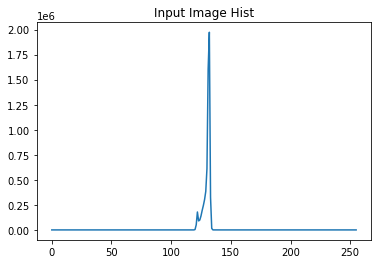

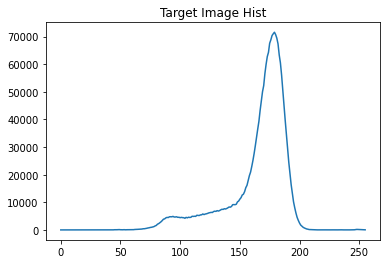

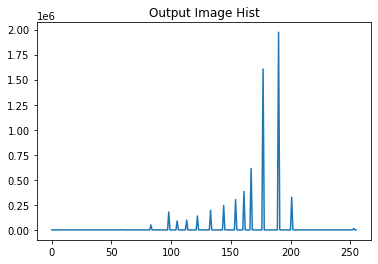

In [15]:
histg1 = drawHistogram(mMap)
histg2 = drawHistogram(Ref)
histg3 = drawHistogram(out)
plt.plot(histg1)
plt.title("Input Image Hist")
plt.show()
plt.plot(histg2)
plt.title("Target Image Hist")
plt.show()
plt.plot(histg3)
plt.title("Output Image Hist")
plt.show()